# Image Recognition using:
### Random Forest, Feed Forward NN, CNN

In [35]:
import time
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import MaxPool2D, AvgPool2D
from keras.layers import Flatten, Activation
import keras.backend as K
from keras import datasets
from keras.datasets import mnist
from keras.utils.np_utils import to_categorical
import matplotlib.pyplot as plt

from scipy.ndimage.filters import convolve
from scipy.signal import convolve2d
from scipy import misc

from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

### Challenge - CIFAR10 image recognition

This is the [Cifar 10 Dataset](http://www.cs.toronto.edu/~kriz/cifar.html), a very famous dataset that contains images for 10 different categories:

- airplane 										
- automobile 										
- bird 										
- cat 										
- deer 										
- dog 										
- frog 										
- horse 										
- ship 										
- truck


Here's what you have to do:
- load the cifar10 dataset using `keras.datasets.cifar10.load_data()`
- display a few images, see how hard/easy it is for you to recognize an object with such low resolution
- build the following image classification models and compare the performance
    - Random Forest
    - Feed Forward Neural Network
    - Convolution Neural Network with the following architecture
        - conv2d
        - conv2d
        - maxpool
        - conv2d
        - conv2d
        - maxpool
        - flatten
        - dense
        - output

In [23]:
from keras.datasets import cifar10

In [127]:
(X_train,y_train),(X_test,y_test) = cifar10.load_data()

In [129]:
X_train.shape

(50000, 32, 32, 3)

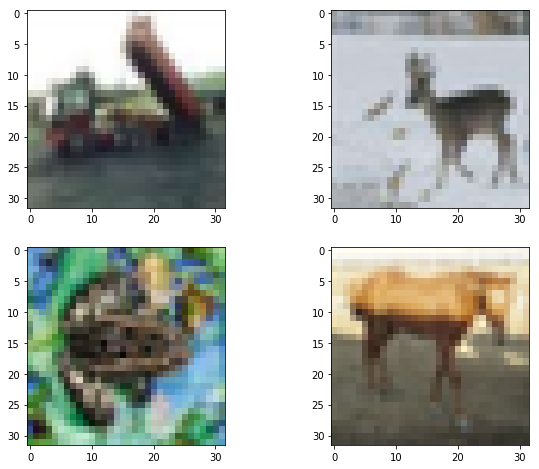

In [26]:
plt.figure(figsize=(10,8))
plt.subplot(221)
plt.imshow(X_train[2])

plt.subplot(222)
plt.imshow(X_train[20])

plt.subplot(223)
plt.imshow(X_train[200])

plt.subplot(224)
plt.imshow(X_train[2000])

In [110]:
X_train = X_train.reshape(-1,32*32*3)
X_test = X_test.reshape(-1,32*32*3)

In [111]:
X_train.shape

(50000, 3072)

In [130]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.0
X_test /= 255.0

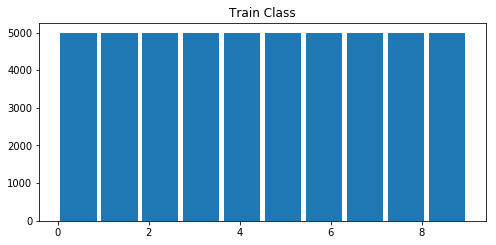

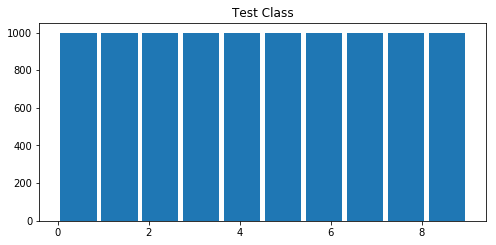

In [113]:
plt.figure(figsize=(8,8))
plt.subplot(211)
plt.title('Train Class')
plt.hist(y_train,rwidth=0.9)
plt.show()

plt.figure(figsize=(8,8))
plt.subplot(212)
plt.title('Test Class')
plt.hist(y_test,rwidth=0.9)
plt.show()

## Random Forest Classifier

In [36]:
start = time.time()

clf = RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

end = time.time()

print('Random forest took: %.3f seconds to train and evauate' %(end - start))

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Accuracy: 0.471
Random forest took: 287.571 seconds to train and evauate


In [43]:
a = metrics.precision_recall_fscore_support(y_test,y_pred,average='macro')

In [52]:
print('Precision: %3f'%(a[0]*100))
print('Recall: %3f'%(a[1]*100))
print('F1: %3f'%(a[2]*100))

Precision: 46.604978
Recall: 47.100000
F1: 46.703382


## Feedforward NN

In [114]:
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [117]:
K.clear_session()

model = Sequential()

model.add(Dense(1024, input_dim=32*32*3, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1024)              3146752   
_________________________________________________________________
dense_2 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_3 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_4 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 3,837,066
Trainable params: 3,837,066
Non-trainable params: 0
_________________________________________________________________


In [118]:
start = time.time()

model.fit(X_train,y_train_cat,batch_size=128,epochs=10,validation_split=0.2)

end = time.time()
print('Feed Forward Network took: %.3f seconds to train and evauate' %(end - start))

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 23s 579us/step - loss: 1.9985 - acc: 0.2528 - val_loss: 1.9113 - val_acc: 0.2993
Epoch 2/10
40000/40000 [==============================] - 22s 558us/step - loss: 1.8211 - acc: 0.3348 - val_loss: 1.8102 - val_acc: 0.3417
Epoch 3/10
40000/40000 [==============================] - 22s 559us/step - loss: 1.7325 - acc: 0.3713 - val_loss: 1.7016 - val_acc: 0.3881
Epoch 4/10
40000/40000 [==============================] - 22s 560us/step - loss: 1.6750 - acc: 0.3891 - val_loss: 1.6766 - val_acc: 0.3952
Epoch 5/10
40000/40000 [==============================] - 23s 564us/step - loss: 1.6263 - acc: 0.4094 - val_loss: 1.6326 - val_acc: 0.4128
Epoch 6/10
40000/40000 [==============================] - 23s 563us/step - loss: 1.5721 - acc: 0.4288 - val_loss: 1.5875 - val_acc: 0.4314
Epoch 7/10
40000/40000 [==============================] - 22s 560us/step - loss: 1.5336 - acc: 0.4454 - val_loss: 1.

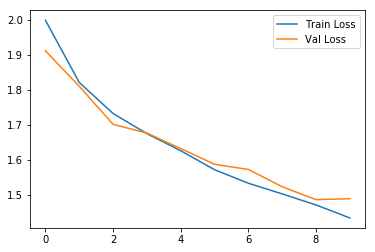

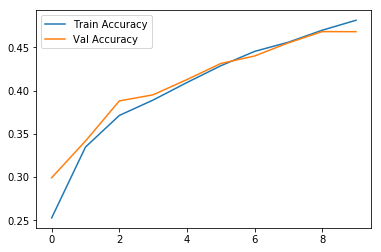

Accuracy: 47.66%
Precision: 48.943375
Recall: 47.660000
F1: 46.405775


In [119]:
plt.plot(model.history.history['loss'],label='Train Loss')
plt.plot(model.history.history['val_loss'],label='Val Loss')
plt.legend()
plt.show()
plt.plot(model.history.history['acc'],label='Train Accuracy')
plt.plot(model.history.history['val_acc'],label='Val Accuracy')
plt.legend()
plt.show()

print('Accuracy: %.2f%%'%(model.evaluate(X_test,y_test_cat,verbose=0)[1]*100))

y_pred = model.predict(X_test)
y_pred = y_pred.argmax(1)

met = metrics.precision_recall_fscore_support(y_test,y_pred,average='macro')
print('Precision: %3f'%(met[0]*100))
print('Recall: %3f'%(met[1]*100))
print('F1: %3f'%(met[2]*100))

## Convolutional Neural Network


In [120]:
X_train = X_train.reshape(-1,32,32,3)
X_test = X_test.reshape(-1,32,32,3)

In [132]:
X_train.shape

(50000, 32, 32, 3)

In [133]:
K.clear_session()

model = Sequential()


model.add(Conv2D(32,(3,3),
                 padding='same',
                 input_shape=(32,32,3),
                 activation='relu'))
model.add(Conv2D(32,(3,3),
                 activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))



model.add(Conv2D(64,(3,3),
                 padding='same',
                 activation='relu'))
model.add(Conv2D(64,(3,3),
                 activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))


model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2304)              0         
__________

In [134]:
start = time.time()

model.fit(X_train,
          y_train_cat,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

end = time.time()
print('CNN took: %.3f seconds to train and evauate' %(end - start))

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 133s 3ms/step - loss: 1.5516 - acc: 0.4361 - val_loss: 1.2785 - val_acc: 0.5454
Epoch 2/10
40000/40000 [==============================] - 144s 4ms/step - loss: 1.1134 - acc: 0.6037 - val_loss: 1.0896 - val_acc: 0.6179
Epoch 3/10
40000/40000 [==============================] - 138s 3ms/step - loss: 0.9092 - acc: 0.6791 - val_loss: 0.9002 - val_acc: 0.6817
Epoch 4/10
40000/40000 [==============================] - 124s 3ms/step - loss: 0.7640 - acc: 0.7333 - val_loss: 0.8006 - val_acc: 0.7251
Epoch 5/10
40000/40000 [==============================] - 118s 3ms/step - loss: 0.6446 - acc: 0.7736 - val_loss: 0.8397 - val_acc: 0.7166
Epoch 6/10
40000/40000 [==============================] - 115s 3ms/step - loss: 0.5450 - acc: 0.8103 - val_loss: 0.7820 - val_acc: 0.7376
Epoch 7/10
40000/40000 [==============================] - 116s 3ms/step - loss: 0.4364 - acc: 0.8475 - val_loss: 0.8137 - 

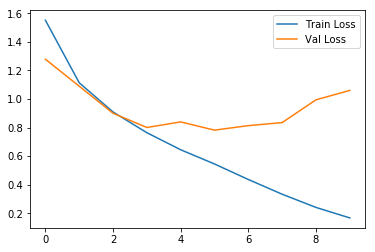

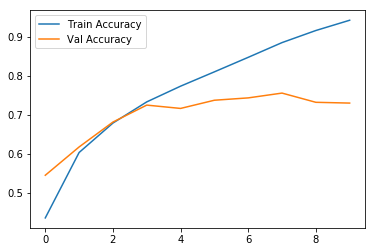

Accuracy: 72.31%
Precision: 73.677056
Recall: 72.310000
F1: 72.730190


In [136]:
plt.plot(model.history.history['loss'],label='Train Loss')
plt.plot(model.history.history['val_loss'],label='Val Loss')
plt.legend()
plt.show()
plt.plot(model.history.history['acc'],label='Train Accuracy')
plt.plot(model.history.history['val_acc'],label='Val Accuracy')
plt.legend()
plt.show()

print('Accuracy: %.2f%%'%(model.evaluate(X_test,y_test_cat,verbose=0)[1]*100))

y_pred = model.predict(X_test)
y_pred = y_pred.argmax(1)

met = metrics.precision_recall_fscore_support(y_test,y_pred,average='macro')
print('Precision: %3f'%(met[0]*100))
print('Recall: %3f'%(met[1]*100))
print('F1: %3f'%(met[2]*100))

## Save your model as a local file

In [137]:
import pickle

In [138]:
pickle.dump(model,open('cnn_model.sav','wb'))

In [139]:
loaded_model = pickle.load(open('cnn_model.sav', 'rb'))
result = loaded_model.evaluate(X_test, y_test_cat)[1]
print(result)

10000/10000 [==============================] - 9s 859us/step
0.7231
